<a href="https://colab.research.google.com/github/pratsup/klf/blob/main/Copy_of_SocialMediaAnalysis_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install Library

In [1]:
!pip install openai pandas matplotlib seaborn plotly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import openai
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import json
import time
from tqdm import tqdm

## Openai API Authorization

In [4]:
from google.colab import userdata

# Access the secret
api_key = userdata.get('openapi_key')

In [5]:
openai.api_key=api_key

## Social Media Analysis Function

In [6]:
from openai import OpenAI

client = OpenAI(api_key=api_key)  # Optional if already set

def classify_opinion(text):
    prompt = f"apakah teks ini merupakan opini masyarakat? jawab ya atau tidak:\n\n\"{text}\""
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

def analyze_sentiment(text):
    prompt = f"tentukan sentimen dari teks ini? jawab dengan positive, negative atau neutral:\n\n\"{text}\""
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}]
    )
    out = response.choices[0].message.content.strip()
    if "positive" in out:
        return "positive"
    elif "negative" in out:
        return "negative"
    else:
        return "neutral"

def extract_info(text):
    prompt = f"lakukan ekstraksi informasi dari teks berikut ini, meliputi named entities beserta entity type seperti person, organization, etc, hashtags, dan topik:\n\n\"{text}\" return the result in json format"
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()

In [7]:
# Membaca file CSV
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KLF/result_coretax_25.csv')

In [8]:
data.columns

Index(['conversation_id_str', 'created_at', 'favorite_count', 'full_text',
       'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location',
       'quote_count', 'reply_count', 'retweet_count', 'tweet_url',
       'user_id_str', 'username'],
      dtype='object')

In [9]:
dftext = data[['conversation_id_str','created_at','username','full_text','in_reply_to_screen_name','image_url','location','lang']].rename(columns={'full_text': 'text'})
dftext.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in


In [10]:
text = dftext['text'][0]

In [11]:
text

'Goblog banget coretax ini kapan benernya sih? Kalau ga mampu resign aja lah nyusahin orang aja yg mau taat pajak. https://t.co/thMhU6kAD5'

In [10]:
#text = "kebijakan ppn 12% yg dikeluarkan oleh kementerian keuangan merupakan jalan pintas yang membebani ekonomi rakyat"

In [12]:
classify_opinion(text)

'**Ya**, teks tersebut merupakan opini masyarakat.'

In [13]:
analyze_sentiment(text)

'negative'

In [14]:
extract_info(text).replace("\n", "")

'{  "named_entities": [    {      "entity": "coretax",      "type": "organization"    }  ],  "hashtags": [],  "topics": [    "coretax",    "pajak",    "layanan publik"  ]}'

In [18]:
data2 = dftext[:148]

In [19]:
data2['label'] = data2['text'].apply(analyze_sentiment)

<ipython-input-19-528b73ca8f64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['label'] = data2['text'].apply(analyze_sentiment)


In [20]:
data2.head(50)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,label
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,negative
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative
5,1922864371002126813,Thu May 15 03:59:25 +0000 2025,NaN,#KawanPajak sudah kenal dengan tampilan baru l...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,positive
6,1887787826676445672,Fri Feb 07 08:57:45 +0000 2025,NaN,Biaya Pembuatan Coretax Disebut Lebih Mahal da...,NaN,https://pbs.twimg.com/media/GjLE788a0AAmsQT.jpg,NaN,in,negative
7,1922861820789801415,Thu May 15 03:49:17 +0000 2025,NaN,#KawanPajak waspada penipuan yang mengatasnama...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,negative
8,1900132452162789715,Thu Mar 13 10:30:54 +0000 2025,NaN,Dalam dokumen APBN KiTa Edisi Februari 2025 re...,NaN,https://pbs.twimg.com/media/Gl6gZP5W0AAnESC.jpg,NaN,in,negative
9,1923159757780554026,Thu May 15 23:33:11 +0000 2025,NaN,Iki CORETAX sak jan jane niat gak sih yg buat ...,NaN,https://pbs.twimg.com/media/GrBvm4qaAAAVkgU.jpg,NaN,in,negative


## Data Visualization

In [21]:
data2["date"] = pd.to_datetime(data2["created_at"])
data2["day"] = data2["date"].dt.date
data2["month"] = data2["date"].dt.to_period("M")

<ipython-input-21-0ee8025a8c9e>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data2["date"] = pd.to_datetime(data2["created_at"])
<ipython-input-21-0ee8025a8c9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["date"] = pd.to_datetime(data2["created_at"])
<ipython-input-21-0ee8025a8c9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2["day"] = data2["dat

In [22]:
data2.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,label,date,day,month
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative,2025-05-15 03:12:22+00:00,2025-05-15,2025-05
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,negative,2025-01-20 07:00:01+00:00,2025-01-20,2025-01
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral,2025-05-16 06:46:00+00:00,2025-05-16,2025-05
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative,2025-05-14 11:15:30+00:00,2025-05-14,2025-05
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative,2025-05-15 12:17:37+00:00,2025-05-15,2025-05


### Daily Trend of Sentiment

<ipython-input-23-6d36d65b94bd>:9: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


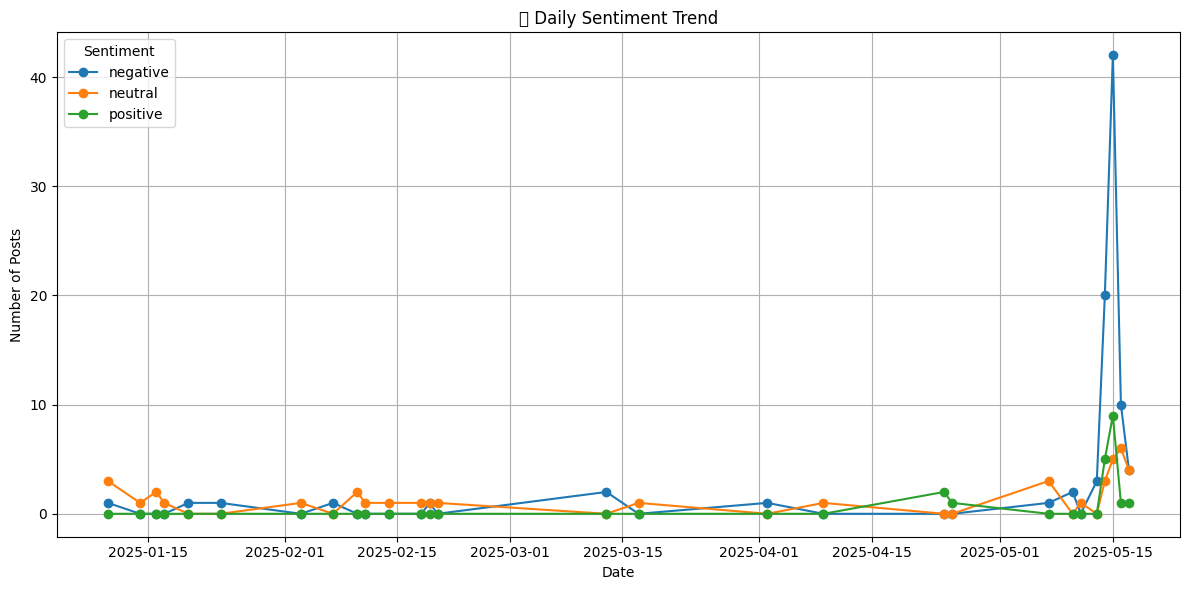

In [23]:
daily_sentiment = data2.groupby(["day", "label"]).size().unstack(fill_value=0)

daily_sentiment.plot(figsize=(12, 6), marker='o')
plt.title("📆 Daily Sentiment Trend")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()

### Monthly Comparisson of Sentiment

<ipython-input-24-2f77b6ccad8b>:9: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128467 (\N{SPIRAL CALENDAR PAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


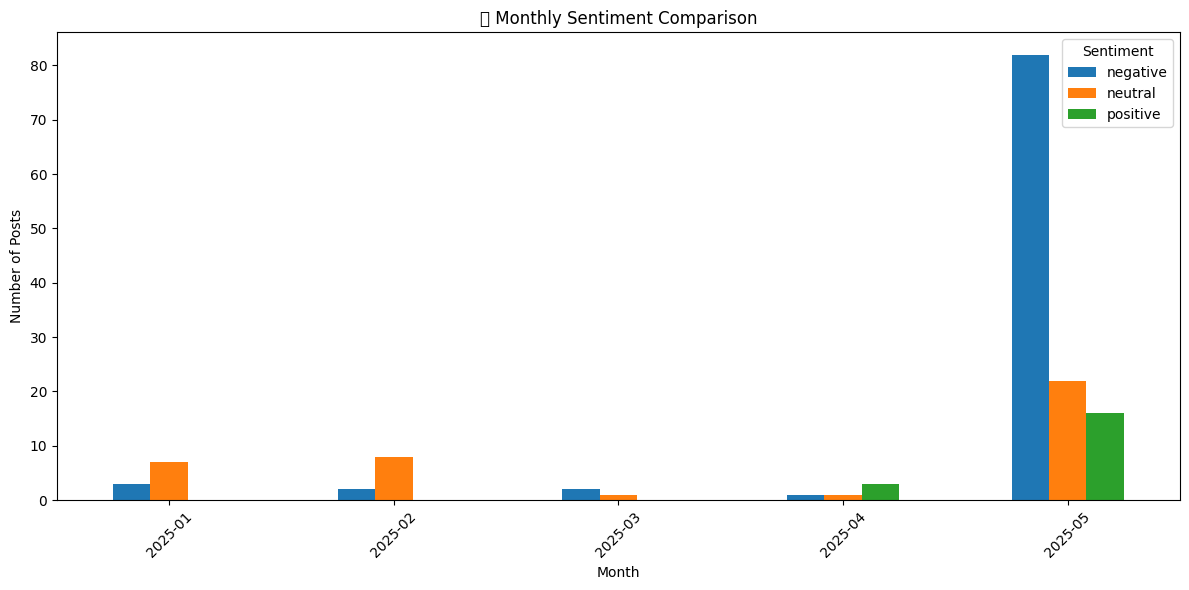

In [24]:
monthly_sentiment = data2.groupby(["month", "label"]).size().unstack(fill_value=0)

monthly_sentiment.plot(kind="bar", figsize=(12, 6))
plt.title("🗓️ Monthly Sentiment Comparison")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


## Additional: Bulk Prompt

### Sentiment Classification

In [25]:
def analyze_sentiment_bulk(texts):
    # Build the bulk prompt
    prompt = "Tentukan sentimen dari teks-teks berikut. Jawab hanya dalam format JSON array seperti:\n" \
             '[{"index": 0, "sentiment": "positive"}, {"index": 1, "sentiment": "neutral"}]\n\n'

    for i, text in enumerate(texts):
        prompt += f"{i}. {text}\n"

    # Send to OpenAI
    response = client.chat.completions.create(
        model="gpt-4.1",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.2,
    )

    content = response.choices[0].message.content.strip()

    # Parse JSON array from response
    import json, re

    try:
        json_string = re.search(r'\[.*\]', content, re.DOTALL).group(0)
        results = json.loads(json_string)
        return results
    except Exception as e:
        print("Failed to parse JSON:\n", content)
        raise e


In [26]:
# Sample DataFrame
dfbulk = dftext[:10]

# Run bulk sentiment analysis
results = analyze_sentiment_bulk(dfbulk["text"].tolist())

# Store back in DataFrame
dfbulk["sentiment"] = ""
for r in results:
    dfbulk.loc[r["index"], "sentiment"] = r["sentiment"]


<ipython-input-26-036cfa0fe7f9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbulk["sentiment"] = ""


In [27]:
dfbulk.head(10)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative
5,1922864371002126813,Thu May 15 03:59:25 +0000 2025,NaN,#KawanPajak sudah kenal dengan tampilan baru l...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,positive
6,1887787826676445672,Fri Feb 07 08:57:45 +0000 2025,NaN,Biaya Pembuatan Coretax Disebut Lebih Mahal da...,NaN,https://pbs.twimg.com/media/GjLE788a0AAmsQT.jpg,NaN,in,negative
7,1922861820789801415,Thu May 15 03:49:17 +0000 2025,NaN,#KawanPajak waspada penipuan yang mengatasnama...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,neutral
8,1900132452162789715,Thu Mar 13 10:30:54 +0000 2025,NaN,Dalam dokumen APBN KiTa Edisi Februari 2025 re...,NaN,https://pbs.twimg.com/media/Gl6gZP5W0AAnESC.jpg,NaN,in,negative
9,1923159757780554026,Thu May 15 23:33:11 +0000 2025,NaN,Iki CORETAX sak jan jane niat gak sih yg buat ...,NaN,https://pbs.twimg.com/media/GrBvm4qaAAAVkgU.jpg,NaN,in,negative


In [28]:
def process_sentiment_in_batches(df, text_col="text", batch_size=50):
    df["sentiment"] = ""  # Create empty column

    num_rows = len(df)
    for i in range(0, num_rows, batch_size):
        batch_df = df.iloc[i:i + batch_size]
        batch_texts = batch_df[text_col].tolist()

        try:
            results = analyze_sentiment_bulk(batch_texts)
            for r in results:
                df.at[i + r["index"], "sentiment"] = r["sentiment"]
        except Exception as e:
            print(f"Error in batch {i}–{i + batch_size}: {e}")

    return df


In [29]:
df_result = process_sentiment_in_batches(dftext, text_col="text", batch_size=50)

In [30]:
df_result.columns

Index(['conversation_id_str', 'created_at', 'username', 'text',
       'in_reply_to_screen_name', 'image_url', 'location', 'lang',
       'sentiment'],
      dtype='object')

In [31]:
df_result.describe()

,conversation_id_str,username,location
count,1.480000e+02,0.0,0.0
mean,1.916834e+18,NaN,NaN
std,1.344598e+16,NaN,NaN
min,1.877528e+18,NaN,NaN
25%,1.922315e+18,NaN,NaN
50%,1.922850e+18,NaN,NaN
75%,1.922930e+18,NaN,NaN
max,1.923778e+18,NaN,NaN


In [32]:
df_result.head(50)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative
5,1922864371002126813,Thu May 15 03:59:25 +0000 2025,NaN,#KawanPajak sudah kenal dengan tampilan baru l...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,positive
6,1887787826676445672,Fri Feb 07 08:57:45 +0000 2025,NaN,Biaya Pembuatan Coretax Disebut Lebih Mahal da...,NaN,https://pbs.twimg.com/media/GjLE788a0AAmsQT.jpg,NaN,in,negative
7,1922861820789801415,Thu May 15 03:49:17 +0000 2025,NaN,#KawanPajak waspada penipuan yang mengatasnama...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,neutral
8,1900132452162789715,Thu Mar 13 10:30:54 +0000 2025,NaN,Dalam dokumen APBN KiTa Edisi Februari 2025 re...,NaN,https://pbs.twimg.com/media/Gl6gZP5W0AAnESC.jpg,NaN,in,negative
9,1923159757780554026,Thu May 15 23:33:11 +0000 2025,NaN,Iki CORETAX sak jan jane niat gak sih yg buat ...,NaN,https://pbs.twimg.com/media/GrBvm4qaAAAVkgU.jpg,NaN,in,negative


### Information Extraction

In [33]:
def extract_info_bulk(texts):
    """
    Extracts structured info (named entities, hashtags, topics) from multiple texts using OpenAI.
    Uses a single API call per batch and returns results as a dictionary indexed by row.
    """
    input_data = {str(i): text for i, text in enumerate(texts)}

    # Construct prompt
    prompt = (
        "Lakukan ekstraksi informasi dari teks berikut ini, meliputi:\n"
        "- named entities beserta entity type seperti person, organization, etc,\n"
        "- hashtags,\n"
        "- topik.\n\n"
        "Return the result in JSON array format only. Example format:\n"
        '[{"named_entities": [{"entity": "kementerian keuangan","type": "organization"}],'
        '"hashtags": [], "topik": ["PPN","kebijakan fiskal","ekonomi rakyat","kebijakan pemerintah"]}]\n\n'
        "Teks:\n"
    )

    for i, text in input_data.items():
        prompt += f"[{i}]: \"{text}\"\n"

    try:
        response = client.chat.completions.create(
            model="gpt-4.1",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.2
        )
        # Expecting a JSON array
        raw_result = json.loads(response.choices[0].message.content)

        # Rebuild as dict indexed by original order
        result_dict = {i: item for i, item in enumerate(raw_result)}
        return result_dict

    except Exception as e:
        print("Error during batch:", e)
        return {}

In [34]:
def process_ifextract_in_batches(df, text_col="text", batch_size=50):
    df["sentiment"] = ""  # Create empty column

    num_rows = len(df)
    for i in range(0, num_rows, batch_size):
        batch_df = df.iloc[i:i + batch_size]
        batch_texts = batch_df[text_col].tolist()

        try:
            results = extract_info_bulk(batch_texts.tolist())
            df['extracted_info'].index.map(lambda idx: results.get(idx, {}))
        except Exception as e:
            print(f"Error in batch {i}–{i + batch_size}: {e}")

    return df

In [35]:
# Run bulk sentiment analysis
ifresults = extract_info_bulk(dfbulk["text"].tolist())

# Store back in DataFrame
dfbulk["info_result"] = ""
dfbulk["info_result"] = dfbulk.index.map(lambda idx: ifresults.get(idx, {}))

<ipython-input-35-1194822ac130>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbulk["info_result"] = ""
<ipython-input-35-1194822ac130>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbulk["info_result"] = dfbulk.index.map(lambda idx: ifresults.get(idx, {}))


In [36]:
dfbulk.head(10)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,info_result
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative,"{'named_entities': [{'entity': 'coretax', 'typ..."
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral,"{'named_entities': [{'entity': 'Coretax', 'typ..."
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral,"{'named_entities': [{'entity': 'Bandung', 'typ..."
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
5,1922864371002126813,Thu May 15 03:59:25 +0000 2025,NaN,#KawanPajak sudah kenal dengan tampilan baru l...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,positive,"{'named_entities': [{'entity': 'Coretax', 'typ..."
6,1887787826676445672,Fri Feb 07 08:57:45 +0000 2025,NaN,Biaya Pembuatan Coretax Disebut Lebih Mahal da...,NaN,https://pbs.twimg.com/media/GjLE788a0AAmsQT.jpg,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
7,1922861820789801415,Thu May 15 03:49:17 +0000 2025,NaN,#KawanPajak waspada penipuan yang mengatasnama...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,neutral,"{'named_entities': [{'entity': 'DJP', 'type': ..."
8,1900132452162789715,Thu Mar 13 10:30:54 +0000 2025,NaN,Dalam dokumen APBN KiTa Edisi Februari 2025 re...,NaN,https://pbs.twimg.com/media/Gl6gZP5W0AAnESC.jpg,NaN,in,negative,{'named_entities': [{'entity': 'APBN KiTa Edis...
9,1923159757780554026,Thu May 15 23:33:11 +0000 2025,NaN,Iki CORETAX sak jan jane niat gak sih yg buat ...,NaN,https://pbs.twimg.com/media/GrBvm4qaAAAVkgU.jpg,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."


In [37]:
def apply_extract_info_bulk(df, text_col="text", batch_size=50):
    """
    Applies extract_info_bulk to a DataFrame in batches and stores JSON array into `info_result`.
    """
    all_results = {}

    for i in tqdm(range(0, len(df), batch_size)):
        batch = df.iloc[i:i+batch_size]
        texts = batch[text_col].tolist()
        batch_result = extract_info_bulk(texts)
        len(batch_result)

        for j, info in batch_result.items():
            all_results[batch.index[j]] = info

        time.sleep(0.5)  # Avoid API rate limits
    return all_results

In [38]:
all_results = apply_extract_info_bulk(df_result, text_col="text", batch_size=20)

100%|██████████| 8/8 [02:19<00:00, 17.50s/it]


In [39]:
all_results

{0: {'named_entities': [{'entity': 'coretax', 'type': 'organization'}],
  'hashtags': [],
  'topik': ['Coretax',
   'pajak',
   'keluhan pengguna',
   'sistem administrasi perpajakan']},
 1: {'named_entities': [{'entity': 'Coretax', 'type': 'organization'},
   {'entity': 'Januari 2025', 'type': 'date'}],
  'hashtags': ['#detikcom'],
  'topik': ['Coretax',
   'sistem administrasi perpajakan',
   'kesiapan sistem',
   'informasi publik']},
 2: {'named_entities': [{'entity': 'Bandung', 'type': 'location'},
   {'entity': '16/5/2025', 'type': 'date'},
   {'entity': 'PPSDM Aparatur', 'type': 'organization'},
   {'entity': 'Kantor Pelayanan Pajak (KPP) Pratama Bandung Cibeunying',
    'type': 'organization'},
   {'entity': 'Rosina Dwi Rahadiani', 'type': 'person'},
   {'entity': 'Kania Laily Salsabila', 'type': 'person'}],
  'hashtags': [],
  'topik': ['Coretax', 'sosialisasi', 'pajak', 'kegiatan pemerintah']},
 3: {'named_entities': [{'entity': 'Coretax', 'type': 'organization'},
   {'entity

In [40]:
df_result["extracted_info"] = df_result.index.map(lambda idx: all_results.get(idx, {}))

In [41]:
df_result.head(10)

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative,"{'named_entities': [{'entity': 'coretax', 'typ..."
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral,"{'named_entities': [{'entity': 'Coretax', 'typ..."
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral,"{'named_entities': [{'entity': 'Bandung', 'typ..."
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
5,1922864371002126813,Thu May 15 03:59:25 +0000 2025,NaN,#KawanPajak sudah kenal dengan tampilan baru l...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,positive,"{'named_entities': [{'entity': 'Coretax', 'typ..."
6,1887787826676445672,Fri Feb 07 08:57:45 +0000 2025,NaN,Biaya Pembuatan Coretax Disebut Lebih Mahal da...,NaN,https://pbs.twimg.com/media/GjLE788a0AAmsQT.jpg,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
7,1922861820789801415,Thu May 15 03:49:17 +0000 2025,NaN,#KawanPajak waspada penipuan yang mengatasnama...,NaN,https://pbs.twimg.com/amplify_video_thumb/1922...,NaN,in,neutral,"{'named_entities': [{'entity': 'DJP', 'type': ..."
8,1900132452162789715,Thu Mar 13 10:30:54 +0000 2025,NaN,Dalam dokumen APBN KiTa Edisi Februari 2025 re...,NaN,https://pbs.twimg.com/media/Gl6gZP5W0AAnESC.jpg,NaN,in,negative,{'named_entities': [{'entity': 'APBN KiTa Edis...
9,1923159757780554026,Thu May 15 23:33:11 +0000 2025,NaN,Iki CORETAX sak jan jane niat gak sih yg buat ...,NaN,https://pbs.twimg.com/media/GrBvm4qaAAAVkgU.jpg,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."


### Save to File

In [42]:
df_result.to_csv('/content/drive/MyDrive/Colab Notebooks/KLF/to_db_coretax_25.csv', index=False)

In [43]:
df_result.columns

Index(['conversation_id_str', 'created_at', 'username', 'text',
       'in_reply_to_screen_name', 'image_url', 'location', 'lang', 'sentiment',
       'extracted_info'],
      dtype='object')

In [44]:
df_result.groupby(by=['sentiment']).count()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,extracted_info
sentiment,,,,,,,,,
negative,80,80,0,80,2,10,0,80,80
neutral,47,47,0,47,3,18,0,47,47
positive,21,21,0,21,0,12,0,21,21


## Data Processing

### Export Data to CSV

In [45]:
dfsentimen = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KLF/to_db_coretax_25.csv')

In [46]:
dfsentimen.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info
0,1922852528577765766,Thu May 15 03:12:22 +0000 2025,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative,"{'named_entities': [{'entity': 'coretax', 'typ..."
1,1881235212702564368,Mon Jan 20 07:00:01 +0000 2025,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral,"{'named_entities': [{'entity': 'Coretax', 'typ..."
2,1923268677970931780,Fri May 16 06:46:00 +0000 2025,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral,"{'named_entities': [{'entity': 'Bandung', 'typ..."
3,1922493772417368149,Wed May 14 11:15:30 +0000 2025,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
4,1922989744012562584,Thu May 15 12:17:37 +0000 2025,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."


In [47]:
# prompt: transform created_at with value like Tue Dec 17 10:32:36 +0000 2024 to date format

dfsentimen["created_at"] = pd.to_datetime(dfsentimen["created_at"], format='%a %b %d %H:%M:%S +0000 %Y')
dfsentimen.head()


,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info
0,1922852528577765766,2025-05-15 03:12:22,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative,"{'named_entities': [{'entity': 'coretax', 'typ..."
1,1881235212702564368,2025-01-20 07:00:01,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral,"{'named_entities': [{'entity': 'Coretax', 'typ..."
2,1923268677970931780,2025-05-16 06:46:00,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral,"{'named_entities': [{'entity': 'Bandung', 'typ..."
3,1922493772417368149,2025-05-14 11:15:30,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."
4,1922989744012562584,2025-05-15 12:17:37,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ..."


In [48]:
dfsentimen.to_csv('/content/drive/MyDrive/Colab Notebooks/KLF/to_db_coretax_25_clean.csv', index=False)

### Storing to Database

### Create Database Connection

In [49]:
# Access the secret
neonpass = userdata.get('neon_pass')

In [50]:
from sqlalchemy import create_engine

In [51]:
# Define your connection string (adjust based on your Neon credentials)
db_config = {
    "user": "neondb_owner",
    "password": neonpass,
    "host": "ep-patient-recipe-a551agf4-pooler.us-east-2.aws.neon.tech",  # Usually ends in .neon.tech
    "port": "5432",
    "database": "klfdemo",
}

db_url = f"postgresql+psycopg2://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}"

# Create SQLAlchemy engine
engine = create_engine(db_url)

### Store Sentiment Data

In [52]:
dfsentimen['keyword_id'] = 1

In [53]:
tbsentimen = dfsentimen[['conversation_id_str','created_at','username','text','sentiment','keyword_id']]

In [56]:
tbsentimen.to_sql('sentimendata', schema='anmedsos', con=engine, if_exists='replace', index=False)

148

In [57]:
dfsentimen.to_sql('tb_socmed_result', schema='anmedsos', con=engine, if_exists='replace', index=False)

148

### Store Topic Data

In [58]:
dfsentimen.head()

,conversation_id_str,created_at,username,text,in_reply_to_screen_name,image_url,location,lang,sentiment,extracted_info,keyword_id
0,1922852528577765766,2025-05-15 03:12:22,NaN,Goblog banget coretax ini kapan benernya sih? ...,NaN,https://pbs.twimg.com/tweet_video_thumb/Gq9YLX...,NaN,in,negative,"{'named_entities': [{'entity': 'coretax', 'typ...",1
1,1881235212702564368,2025-01-20 07:00:01,NaN,Sistem inti administrasi perpajaan atau Coreta...,NaN,https://pbs.twimg.com/ext_tw_video_thumb/18811...,NaN,in,neutral,"{'named_entities': [{'entity': 'Coretax', 'typ...",1
2,1923268677970931780,2025-05-16 06:46:00,NaN,Bandung Jumat (16/5/2025) PPSDM Aparatur mengg...,NaN,https://pbs.twimg.com/amplify_video_thumb/1923...,NaN,in,neutral,"{'named_entities': [{'entity': 'Bandung', 'typ...",1
3,1922493772417368149,2025-05-14 11:15:30,NaN,@TedInvestigasi Ngomongin machine learning seh...,TedInvestigasi,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ...",1
4,1922989744012562584,2025-05-15 12:17:37,NaN,DEMI ALLAH CORETAX YAALLAH LU YA,NaN,NaN,NaN,in,negative,"{'named_entities': [{'entity': 'Coretax', 'typ...",1


In [59]:
import ast

def safe_parse_info(text):
    if isinstance(text, dict):
        return text
    try:
        # Try JSON first (correct format)
        return json.loads(text)
    except json.JSONDecodeError:
        try:
            # Try parsing as Python dict with single quotes
            return ast.literal_eval(text)
        except Exception as e:
            print(f"Error parsing row: {text[:100]} → {e}")
            return {}

In [60]:
dfsentimen["extracted_info_parsed"] = dfsentimen["extracted_info"].apply(safe_parse_info)

In [61]:
topics_data = []

for idx, row in dfsentimen.iterrows():
    conv_id = row["conversation_id_str"]
    topiks = row.get("extracted_info_parsed", {}).get("topik", [])
    for topic in topiks:
        topics_data.append({"conversation_id_str":conv_id, "topik": topic})

df_topics = pd.DataFrame(topics_data)


In [62]:
df_topics

,conversation_id_str,topik
0,1922852528577765766,Coretax
1,1922852528577765766,pajak
2,1922852528577765766,keluhan pengguna
3,1922852528577765766,sistem administrasi perpajakan
4,1881235212702564368,Coretax
...,...,...
545,1923777679943475270,NIK
546,1923777679943475270,badan usaha
547,1923777679943475270,Ereg Pajak
548,1923777679943475270,PDF


In [63]:
df_topics.to_sql('topicdata', schema='anmedsos', con=engine, if_exists='replace', index=False)

550

### Store Entities

In [64]:
# Step 3: Extract named entities
entities_data = []

for idx, row in dfsentimen.iterrows():
    conv_id = row["conversation_id_str"]
    entities = row.get("extracted_info_parsed", {}).get("named_entities", [])
    for ent in entities:
        entities_data.append({
            "conversation_id": conv_id,  # or replace with another column if needed
            "entity": ent.get("entity"),
            "type": ent.get("type")
        })

# Step 4: Convert to DataFrame
df_entities = pd.DataFrame(entities_data)

In [65]:
df_entities.head()

,conversation_id,entity,type
0,1922852528577765766,coretax,organization
1,1881235212702564368,Coretax,organization
2,1881235212702564368,Januari 2025,date
3,1923268677970931780,Bandung,location
4,1923268677970931780,16/5/2025,date


In [66]:
# Create SQLAlchemy engine
engine = create_engine(db_url)

In [67]:
df_entities.to_sql('entitydata', schema='anmedsos', con=engine, if_exists='replace', index=False)

280